# Preparing data
## Import packages

In [136]:
import pandas as pd
import numpy as np
import os as os
from pathlib import Path
from datetime import datetime


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.dates as md

## Read file

In [138]:
file_name = 'df_cleaned.pkl'
df_cleaned = pd.read_pickle(file_name)
df_date = df_cleaned.copy()
df_date['mm'] = df_cleaned['yyyymmdd'].dt.month
df_date['dd'] = df_cleaned['yyyymmdd'].dt.day

## Preprocessing

### Reshaping

In [139]:
piv = df_date.pivot_table(index=['stno', 'mm', 'dd'], values=['TX01', 'PP01', 'WD01', 'WD02', 'PS01'], aggfunc='mean')
piv

PP01         PS01       TX01      WD01        WD02
stno   mm dd                                                        
466880 1  1   0.615000  1022.325000  15.620000  2.895000   70.500000
          2   0.894737  1021.100000  16.680000  2.535000   86.000000
          3   4.540000  1020.100000  17.100000  2.515000   87.500000
          4   1.155000  1019.145000  17.285000  2.165000  114.500000
          5   1.827778  1019.360000  16.965000  2.145000   91.000000
...                ...          ...        ...       ...         ...
467990 12 27  1.275000  1012.544444  11.833333  4.288889  122.222222
          28  0.670588  1012.655556  11.455556  4.066667  118.333333
          29  1.652941  1012.716667  11.716667  3.855556  135.000000
          30  2.029412  1013.955556  11.322222  4.044444  140.555556
          31  0.088235  1015.772222  10.461111  4.327778  107.777778

[12809 rows x 5 columns]

In [140]:
piv = piv.reset_index(level=[0, 1,2])

In [141]:
piv['date'] = (
    '2020' + '-' 
    + piv['mm'].astype('string').str.zfill(2) + '-' 
    + piv['dd'].astype('string').str.zfill(2)
)

piv['date'] = pd.to_datetime(piv['date'], format='%Y-%m-%d')
piv = piv.drop(columns=['mm', 'dd'])
piv

,stno,PP01,PS01,TX01,WD01,WD02,date
0,466880,0.615000,1022.325000,15.620000,2.895000,70.500000,2020-01-01
1,466880,0.894737,1021.100000,16.680000,2.535000,86.000000,2020-01-02
2,466880,4.540000,1020.100000,17.100000,2.515000,87.500000,2020-01-03
3,466880,1.155000,1019.145000,17.285000,2.165000,114.500000,2020-01-04
4,466880,1.827778,1019.360000,16.965000,2.145000,91.000000,2020-01-05
...,...,...,...,...,...,...,...
12804,467990,1.275000,1012.544444,11.833333,4.288889,122.222222,2020-12-27
12805,467990,0.670588,1012.655556,11.455556,4.066667,118.333333,2020-12-28
12806,467990,1.652941,1012.716667,11.716667,3.855556,135.000000,2020-12-29
12807,467990,2.029412,1013.955556,11.322222,4.044444,140.555556,2020-12-30


In [142]:
dflist = []

def proc(group):
    group = group.set_index('date')
    stno = group['stno'].values[0]
    group = group.drop(columns=['stno'])
    group = group.add_suffix('_' + str(stno))
    dflist.append(group)

piv.groupby('stno').apply(proc)

df_proc = pd.concat(dflist, axis=1, join='outer')
df_proc

,PP01_466880,PS01_466880,TX01_466880,WD01_466880,WD02_466880,PP01_466900,PS01_466900,TX01_466900,WD01_466900,WD02_466900,...,PP01_467780,PS01_467780,TX01_467780,WD01_467780,WD02_467780,PP01_467990,PS01_467990,TX01_467990,WD01_467990,WD02_467990
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.615000,1022.325,15.620,2.895,70.5,3.493258,1018.864557,15.775949,2.831646,89.233333,...,0.000000,1019.628571,15.950000,6.235714,27.142857,0.038889,1015.161111,10.377778,3.711111,79.444444
2020-01-02,0.894737,1021.100,16.680,2.535,86.0,4.312500,1018.845570,15.627848,2.703797,88.933333,...,0.357143,1019.164286,16.850000,4.864286,31.428571,0.618750,1013.711111,11.155556,3.494444,85.000000
2020-01-03,4.540000,1020.100,17.100,2.515,87.5,4.514607,1018.686076,15.886076,2.870886,92.600000,...,6.307692,1018.257143,17.342857,5.392308,23.846154,0.647059,1012.683333,11.594444,3.700000,110.000000
2020-01-04,1.155000,1019.145,17.285,2.165,114.5,4.227586,1018.910127,15.688608,2.934177,83.666667,...,0.107143,1017.757143,17.542857,5.571429,51.428571,0.162500,1011.466667,12.150000,3.466667,160.555556
2020-01-05,1.827778,1019.360,16.965,2.145,91.0,3.297753,1019.768354,15.003797,2.867089,94.800000,...,0.166667,1017.842857,17.657143,5.900000,22.142857,2.129412,1011.583333,11.383333,3.800000,137.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.989474,1020.140,16.470,2.690,67.5,5.910714,1019.041250,15.922500,3.008750,73.157895,...,1.000000,1018.014286,17.357143,6.000000,25.714286,1.275000,1012.544444,11.833333,4.288889,122.222222
2020-12-28,3.011765,1019.855,16.730,2.315,98.0,4.545783,1019.252500,15.905000,2.967500,81.019737,...,0.115385,1018.228571,16.950000,5.914286,27.857143,0.670588,1012.655556,11.455556,4.066667,118.333333
2020-12-29,2.275000,1019.940,16.975,2.255,105.0,5.049425,1018.993750,16.043750,2.726250,90.032895,...,0.357143,1018.078571,17.721429,5.878571,25.714286,1.652941,1012.716667,11.716667,3.855556,135.000000


### Dealing with missing values

In [143]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [144]:
findna = df_proc.isna()
getIndexes(findna, True)

[(Timestamp('2020-01-06 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-01-08 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-01-22 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-02-29 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-02 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-03 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-04 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-06 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-07 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-03-22 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-04-01 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-08-16 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-08-28 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-08-31 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-10-22 00:00:00'), 'PP01_467270'),
 (Timestamp('2020-02-29 00:00:00', freq='D'), 'PS01_467270'),
 (Timestamp('2020-02-29 00:00:00', freq='D'), 'TX01_467270'),
 (Timestamp('2020-02-29 00:00:00', freq='D'), 'WD01_467270'),
 (Timestamp('2020-02-29 00:00:00',

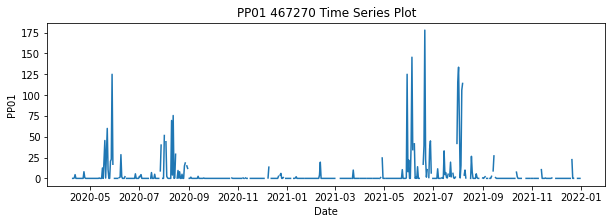

In [145]:
piv = df_cleaned.pivot_table(index=['yyyymmdd'], columns=['stno'], values=['PP01'])

piv.columns = piv.columns.droplevel()
piv = piv.loc[:,467270]

# # Plot

plt.plot(piv)

# Labelling 

plt.xlabel("Date")
plt.ylabel("PP01")
plt.title("PP01 467270 Time Series Plot")

# Display
plt.rcParams["figure.figsize"] = (10,3)
# plt.legend(piv.columns, title=piv.columns.name)
plt.show()

Using forward fill here

In [146]:
df_proc = df_proc.fillna(method="ffill")
df_proc

,PP01_466880,PS01_466880,TX01_466880,WD01_466880,WD02_466880,PP01_466900,PS01_466900,TX01_466900,WD01_466900,WD02_466900,...,PP01_467780,PS01_467780,TX01_467780,WD01_467780,WD02_467780,PP01_467990,PS01_467990,TX01_467990,WD01_467990,WD02_467990
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.615000,1022.325,15.620,2.895,70.5,3.493258,1018.864557,15.775949,2.831646,89.233333,...,0.000000,1019.628571,15.950000,6.235714,27.142857,0.038889,1015.161111,10.377778,3.711111,79.444444
2020-01-02,0.894737,1021.100,16.680,2.535,86.0,4.312500,1018.845570,15.627848,2.703797,88.933333,...,0.357143,1019.164286,16.850000,4.864286,31.428571,0.618750,1013.711111,11.155556,3.494444,85.000000
2020-01-03,4.540000,1020.100,17.100,2.515,87.5,4.514607,1018.686076,15.886076,2.870886,92.600000,...,6.307692,1018.257143,17.342857,5.392308,23.846154,0.647059,1012.683333,11.594444,3.700000,110.000000
2020-01-04,1.155000,1019.145,17.285,2.165,114.5,4.227586,1018.910127,15.688608,2.934177,83.666667,...,0.107143,1017.757143,17.542857,5.571429,51.428571,0.162500,1011.466667,12.150000,3.466667,160.555556
2020-01-05,1.827778,1019.360,16.965,2.145,91.0,3.297753,1019.768354,15.003797,2.867089,94.800000,...,0.166667,1017.842857,17.657143,5.900000,22.142857,2.129412,1011.583333,11.383333,3.800000,137.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.989474,1020.140,16.470,2.690,67.5,5.910714,1019.041250,15.922500,3.008750,73.157895,...,1.000000,1018.014286,17.357143,6.000000,25.714286,1.275000,1012.544444,11.833333,4.288889,122.222222
2020-12-28,3.011765,1019.855,16.730,2.315,98.0,4.545783,1019.252500,15.905000,2.967500,81.019737,...,0.115385,1018.228571,16.950000,5.914286,27.857143,0.670588,1012.655556,11.455556,4.066667,118.333333
2020-12-29,2.275000,1019.940,16.975,2.255,105.0,5.049425,1018.993750,16.043750,2.726250,90.032895,...,0.357143,1018.078571,17.721429,5.878571,25.714286,1.652941,1012.716667,11.716667,3.855556,135.000000


### Normalizing

In [147]:
# normalize
x = df_proc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_data = pd.DataFrame(x_scaled)

# check NaN
scaled_data.isna().sum().sum()
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.023643,0.980576,0.052614,0.822785,0.019802,0.146709,0.949566,0.088195,0.607244,0.131096,...,0.000000,0.996476,0.045776,0.732070,0.033058,0.002951,0.974765,0.071221,0.341074,0.243161
1,0.035145,0.928282,0.121468,0.640506,0.122112,0.201452,0.948506,0.078098,0.512431,0.129222,...,0.007655,0.973573,0.107136,0.472260,0.049587,0.046954,0.914889,0.111919,0.284470,0.273556
2,0.185033,0.885592,0.148750,0.630380,0.132013,0.214957,0.939606,0.095702,0.636344,0.152137,...,0.135202,0.928823,0.140738,0.572291,0.020343,0.049102,0.872448,0.134884,0.338171,0.410334
3,0.045847,0.844824,0.160766,0.453165,0.310231,0.195778,0.952108,0.082240,0.683281,0.096307,...,0.002297,0.904158,0.154373,0.606225,0.126722,0.012331,0.822207,0.163953,0.277213,0.686930
4,0.073511,0.854002,0.139981,0.443038,0.155116,0.133645,1.000000,0.035554,0.633528,0.165886,...,0.003572,0.908386,0.162165,0.668471,0.013774,0.161591,0.827025,0.123837,0.364296,0.559271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.203515,0.887300,0.107827,0.718987,0.000000,0.308248,0.959426,0.098186,0.738585,0.030631,...,0.021434,0.916843,0.141712,0.687415,0.027548,0.096754,0.866713,0.147384,0.492017,0.477204
362,0.122194,0.875133,0.124716,0.529114,0.201320,0.217041,0.971214,0.096993,0.707994,0.079765,...,0.002473,0.927414,0.113954,0.671177,0.035813,0.050888,0.871301,0.127616,0.433962,0.455927
363,0.091900,0.878762,0.140630,0.498734,0.247525,0.250695,0.956775,0.106452,0.529082,0.136093,...,0.007655,0.920014,0.166548,0.664411,0.027548,0.125434,0.873824,0.141279,0.378810,0.547112
364,0.310613,0.922305,0.086067,0.562025,0.313531,0.292421,0.941359,0.108327,0.628271,0.231482,...,0.004946,0.918605,0.142199,0.830853,0.110193,0.154003,0.924983,0.120640,0.428157,0.577508


In [148]:
import pickle

with open('min_max_scaler.pkl', 'wb') as min_max_scaler_file:
  pickle.dump(min_max_scaler, min_max_scaler_file)

# PCA

In [149]:
pca = PCA()
scores = pca.fit_transform(scaled_data)

## Choosing the number of components
#### variance

In [150]:
pca.explained_variance_ratio_

array([7.63244569e-01, 8.72777540e-02, 2.86813659e-02, 2.16099398e-02,
       1.23372710e-02, 5.61902156e-03, 4.71570384e-03, 3.87736205e-03,
       3.18426971e-03, 2.94305611e-03, 2.79281073e-03, 2.71249216e-03,
       2.60309763e-03, 2.39845068e-03, 2.18010105e-03, 2.04892776e-03,
       1.94017973e-03, 1.89193140e-03, 1.75617738e-03, 1.71804901e-03,
       1.59338195e-03, 1.55640975e-03, 1.50985743e-03, 1.41777381e-03,
       1.38332259e-03, 1.32603332e-03, 1.27904462e-03, 1.21448011e-03,
       1.19603153e-03, 1.14005171e-03, 1.06874245e-03, 1.06047856e-03,
       1.01133179e-03, 9.78475217e-04, 9.49927600e-04, 8.98918455e-04,
       8.81906673e-04, 8.72273932e-04, 8.41991408e-04, 7.93607715e-04,
       7.78252343e-04, 7.55193218e-04, 7.33536446e-04, 7.15455938e-04,
       6.98655327e-04, 6.57143644e-04, 6.17422113e-04, 5.94765397e-04,
       5.89411603e-04, 5.56699684e-04, 5.52953969e-04, 5.39821999e-04,
       5.16163939e-04, 4.97341833e-04, 4.81815493e-04, 4.64907397e-04,
      

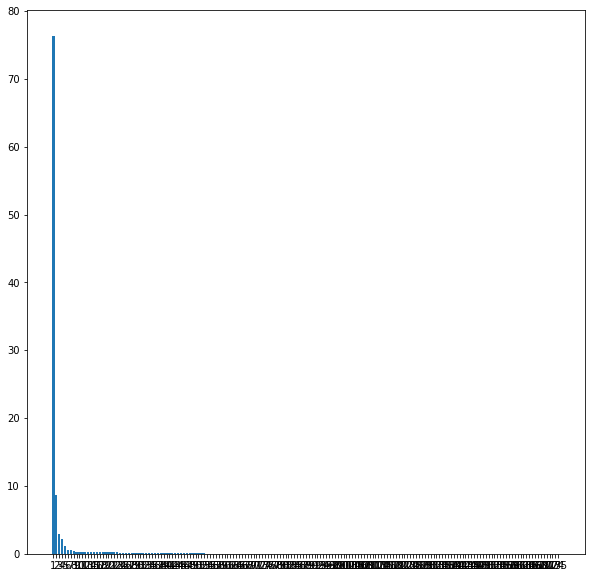

In [151]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

#### cumulative variance plot

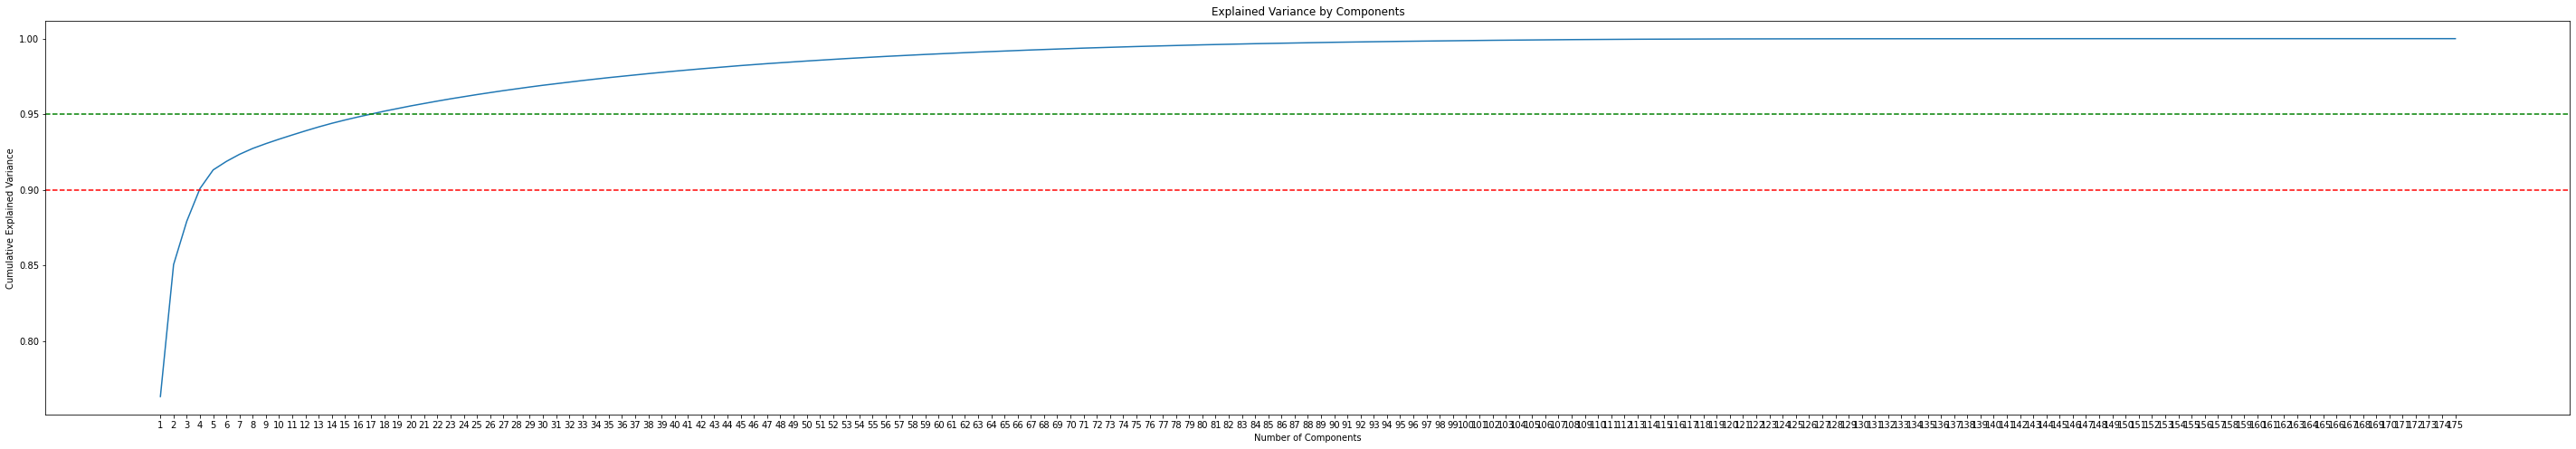

In [152]:

plt.figure(figsize=(50,8))
plt.plot(np.arange(1, 176, 1), pca.explained_variance_ratio_.cumsum(), linestyle = '-')
plt.xticks(np.arange(1, 176, 1))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

plt.axhline(y=0.9, linestyle='--', color='r')
plt.axhline(y=0.95, linestyle='--', color='g')

In [153]:
pca_n = (pca.explained_variance_ratio_.cumsum() < 0.95).sum()
pca_n = 5

5 components is the best choice according to the elbow method.


In [154]:
pca = PCA(pca_n)
scores_pca = pca.fit_transform(scaled_data)
scores_pca

array([[-4.19712161, -0.39609593,  0.46947427, -0.15910937, -0.0861014 ],
       [-4.04830174, -0.53321242,  0.34535636, -0.09736463, -0.15451354],
       [-3.89305662, -0.47145448,  0.25521786,  0.079186  , -0.19520672],
       ...,
       [-3.99720642, -0.16612251,  0.5414395 ,  0.06546011,  0.10940041],
       [-3.97987877, -0.37223788,  0.60297101,  0.03808658,  0.11466235],
       [-4.12847473, -0.40916638,  0.63135202, -0.11908224,  0.04535552]])

In [177]:
with open('pca.pkl', 'wb') as pca_file:
  pickle.dump(pca, pca_file)

# Clustering
## Choosing the number of clusterings

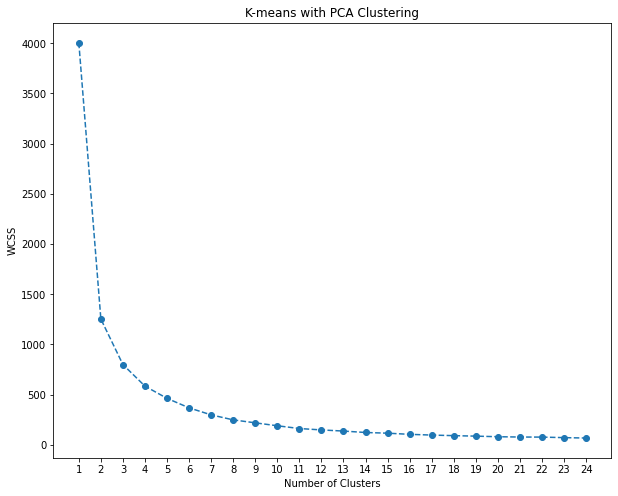

In [155]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,25):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize= (10,8))
plt.plot(range(1, 25), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.xticks(np.arange(1, 25, 1))
plt.show()

Using elbow method, 4 clusters is the best choice.

In [156]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=10)

# Results of PCA and K-Means Clustering


In [157]:

# We create a new data frame with the original features and add the PCA scores and assigned clusters.
piv_pca_kmeans = pd.concat([df_proc.reset_index(drop=False), pd.DataFrame(scores_pca)], axis=1)
piv_pca_kmeans.columns.values[-pca_n: ]= ['Component ' + str(x) for x in range(1,(pca_n+1))]
# The Last column we add contains the pca k-means clustering Labels.
piv_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

## Save cluster_centers_

In [158]:
pd.DataFrame(kmeans_pca.cluster_centers_).to_pickle('pca_kmeans_cluster_centers_.pkl')

## Add seasons' names

In [159]:
cluster_season_dict = {3: 'spring', 1: 'summer', 2: 'fall', 0: 'winter'}

piv_pca_kmeans['season'] = piv_pca_kmeans['Segment K-means PCA']
piv_pca_kmeans = piv_pca_kmeans.replace({"season": cluster_season_dict})
piv_pca_kmeans

,date,PP01_466880,PS01_466880,TX01_466880,WD01_466880,WD02_466880,PP01_466900,PS01_466900,TX01_466900,WD01_466900,...,TX01_467990,WD01_467990,WD02_467990,Component 1,Component 2,Component 3,Component 4,Component 5,Segment K-means PCA,season
0,2020-01-01,0.615000,1022.325,15.620,2.895,70.5,3.493258,1018.864557,15.775949,2.831646,...,10.377778,3.711111,79.444444,-4.197122,-0.396096,0.469474,-0.159109,-0.086101,0,winter
1,2020-01-02,0.894737,1021.100,16.680,2.535,86.0,4.312500,1018.845570,15.627848,2.703797,...,11.155556,3.494444,85.000000,-4.048302,-0.533212,0.345356,-0.097365,-0.154514,0,winter
2,2020-01-03,4.540000,1020.100,17.100,2.515,87.5,4.514607,1018.686076,15.886076,2.870886,...,11.594444,3.700000,110.000000,-3.893057,-0.471454,0.255218,0.079186,-0.195207,0,winter
3,2020-01-04,1.155000,1019.145,17.285,2.165,114.5,4.227586,1018.910127,15.688608,2.934177,...,12.150000,3.466667,160.555556,-3.955833,-0.514455,0.391444,-0.079002,-0.171910,0,winter
4,2020-01-05,1.827778,1019.360,16.965,2.145,91.0,3.297753,1019.768354,15.003797,2.867089,...,11.383333,3.800000,137.222222,-4.191254,-0.444377,0.590661,-0.246730,0.071752,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,4.989474,1020.140,16.470,2.690,67.5,5.910714,1019.041250,15.922500,3.008750,...,11.833333,4.288889,122.222222,-4.038230,0.042036,0.715577,0.094052,0.204708,0,winter
362,2020-12-28,3.011765,1019.855,16.730,2.315,98.0,4.545783,1019.252500,15.905000,2.967500,...,11.455556,4.066667,118.333333,-4.111177,-0.038997,0.561398,-0.129897,0.196024,0,winter
363,2020-12-29,2.275000,1019.940,16.975,2.255,105.0,5.049425,1018.993750,16.043750,2.726250,...,11.716667,3.855556,135.000000,-3.997206,-0.166123,0.541440,0.065460,0.109400,0,winter
364,2020-12-30,7.594118,1020.960,16.135,2.380,115.0,5.673864,1018.717500,16.071250,2.860000,...,11.322222,4.044444,140.555556,-3.979879,-0.372238,0.602971,0.038087,0.114662,0,winter


In [160]:
file_name = 'pca_kmeans_data.pkl'
piv_pca_kmeans.to_pickle(file_name)

## Heatmap

In [161]:
plotdata = pd.concat([piv_pca_kmeans[['date']], piv_pca_kmeans[['Segment K-means PCA']]], axis=1)
plotdata = plotdata.set_index('date')
plotdata = plotdata.transpose()

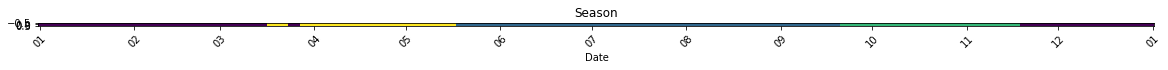

In [162]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
plt.imshow(plotdata)

# Labelling 
ax.xaxis.set_major_locator(md.MonthLocator())
ax.xaxis.set_major_formatter(md.DateFormatter('%m'))

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.title("Season")

plt.show()

## Visualize Clusters by Components


In [163]:
# # PLot data by PCA components. The Y axis is the first component, X axis is the second.
# x_axis = piv_pca_kmeans['Component 2']
# y_axis = piv_pca_kmeans['Component 1']
# plt.figure(figsize = (10,8))
# sns.scatterplot(x_axis, y_axis, hue = piv_pca_kmeans['Segment K-means PCA']) #, palette =['g', 'r', 'c', 'm']
# plt.title('Clusters by PCA Components')
# plt.show()

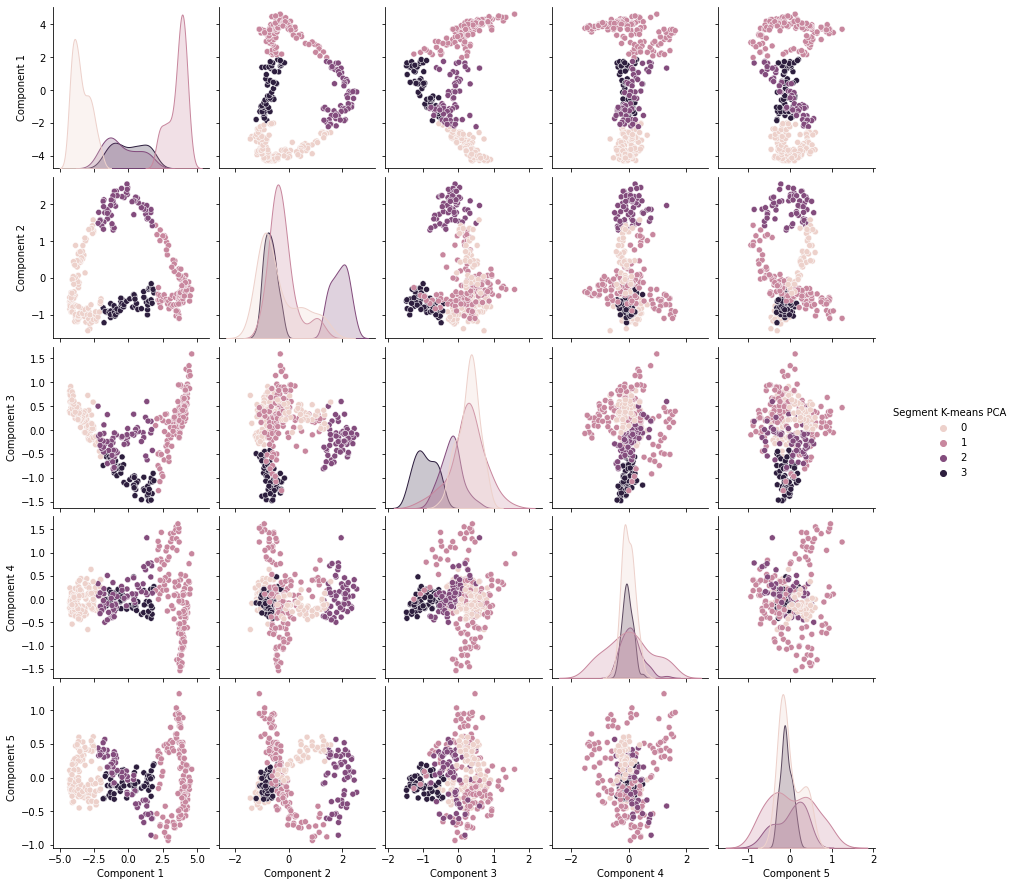

In [175]:
sns.pairplot(piv_pca_kmeans.iloc[:,- (pca_n+2):], hue='Segment K-means PCA')

## Comparison: if we run only the k-means algorithm without PCA

/data1/home/hsnutardis/anaconda3/envs/RCEC_summer_2022/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


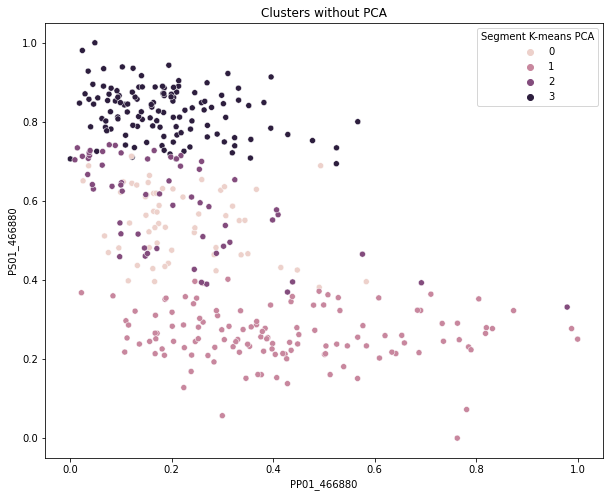

In [165]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 10)

# We fit our data with the k-means pca model
kmeans.fit(scaled_data)

# We create a new data frame with the original features and add the PCA scores and assigned clusters.
piv_pca_kmeans_comp = scaled_data.copy()
piv_pca_kmeans_comp.columns = df_proc.columns.values
# The Last column we add contains the pca k-means clustering Labels.
piv_pca_kmeans_comp['Segment K-means PCA'] = kmeans.labels_
piv_pca_kmeans_comp

# PLot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = piv_pca_kmeans_comp.iloc[:,0]
y_axis = piv_pca_kmeans_comp.iloc[:,1]
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = piv_pca_kmeans_comp['Segment K-means PCA']) #, palette =['g', 'r', 'c', 'm']
plt.title('Clusters without PCA')
plt.show()

# Interpret PCA

In [166]:
loadings = pd.DataFrame(pca.components_, columns=df_proc.columns) 
loadings

,PP01_466880,PS01_466880,TX01_466880,WD01_466880,WD02_466880,PP01_466900,PS01_466900,TX01_466900,WD01_466900,WD02_466900,...,PP01_467780,PS01_467780,TX01_467780,WD01_467780,WD02_467780,PP01_467990,PS01_467990,TX01_467990,WD01_467990,WD02_467990
0,0.034304,-0.081025,0.100765,-0.039354,0.053769,0.023436,-0.104691,0.108209,-0.036619,0.079861,...,0.026573,-0.076608,0.096496,-0.065641,0.088097,0.025390,-0.087191,0.104013,0.004939,0.025977
1,-0.018569,0.004794,0.068075,0.129852,-0.102341,-0.005688,0.008606,0.076726,0.091036,-0.129734,...,-0.018212,-0.008776,0.066698,0.005198,-0.021104,-0.051335,0.014435,0.106576,0.044688,-0.075837
2,0.060032,-0.008530,-0.002132,0.029109,0.032639,0.029531,-0.012380,0.004698,0.133010,-0.022605,...,0.061766,-0.011826,-0.063239,0.115882,-0.039341,-0.010263,-0.007929,0.038779,0.108206,-0.003074
3,0.126663,-0.013880,-0.033955,0.032631,-0.088359,0.280499,-0.012526,-0.039734,-0.026216,-0.077817,...,0.054483,-0.024473,-0.009708,0.003296,-0.028810,0.129516,0.002946,-0.042114,-0.150200,-0.081778
4,0.057981,-0.003402,0.014877,-0.043984,0.081876,0.003669,0.016054,0.012484,-0.074689,0.030826,...,0.041195,-0.002324,0.027547,0.009952,-0.057567,0.064962,-0.020121,0.007231,0.198820,0.090605


In [167]:
loadings.to_pickle('pca_weights.pkl')

## Heatmap

In [168]:
# fig, ax = plt.subplots(1, 1, figsize = (20,16))
# plt.imshow(plotdata, vmin=-plotdata.max().max(), vmax=plotdata.max().max(), cmap='bwr') #bwr, RdBu


# # Labelling 
# plt.xlabel("Features")
# plt.ylabel("PCs")
# plt.title("Interpreting PCA Result")
# plt.colorbar()
# plt.show()

In [169]:
plotdata = loadings.copy()

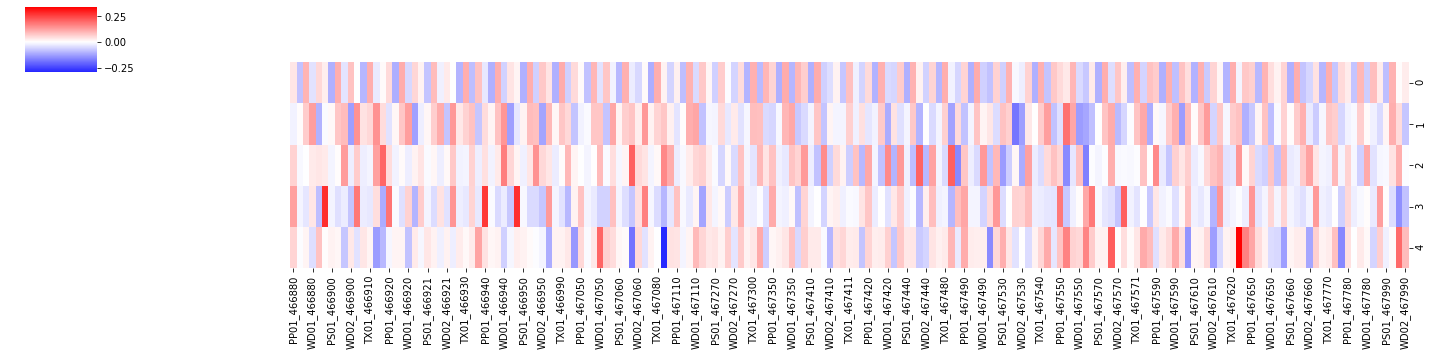

In [170]:
sns.clustermap(plotdata,
               figsize=(20,5),
               row_cluster=False,
               col_cluster=False,
               center=0.00, annot=False,
               cmap="bwr")

In [171]:
sort_cols = np.sort(plotdata.columns).tolist()
plotdata_sorted = plotdata.loc[:,sort_cols]

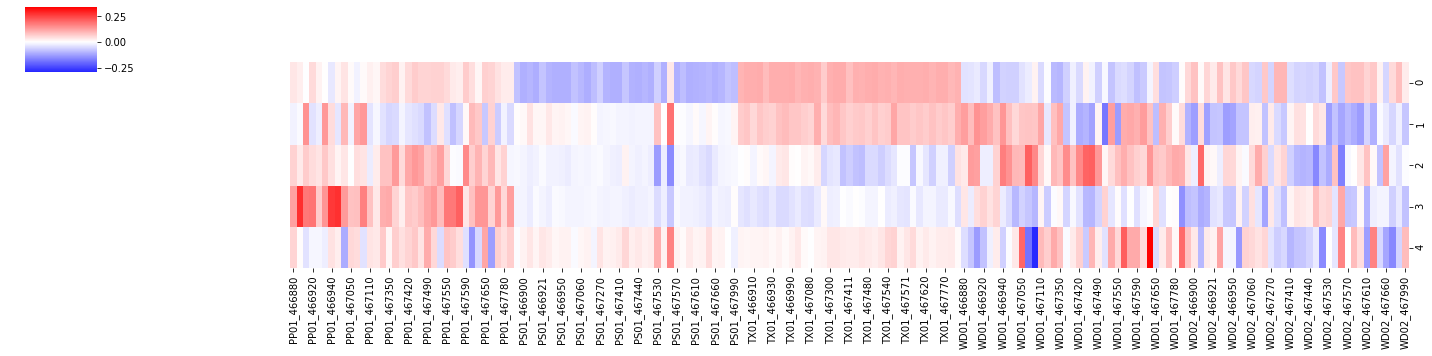

In [172]:
sns.clustermap(plotdata_sorted, 
               figsize=(20,5),
               row_cluster=False,
               col_cluster=False,
               center=0.00, annot=False,
               cmap="bwr")


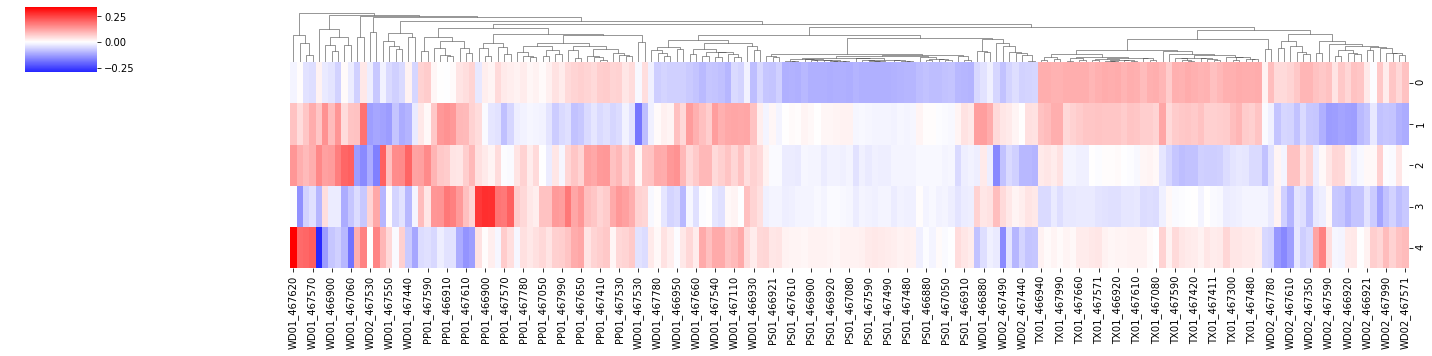

In [173]:
sns.clustermap(plotdata,
               figsize=(20,5),
               row_cluster=False,
               center=0.00, annot=False,
               cmap="bwr")

## Most important features on the PCs (Largest abs)

In [174]:
loadings_abs = loadings.abs()

loadings_abs.apply(lambda x: print(x.sort_values(ascending=False).head(5)), axis=1)

TX01_467410    0.109738
TX01_467490    0.109542
TX01_467350    0.109448
TX01_466920    0.109399
TX01_466990    0.109032
Name: 0, dtype: float64
PS01_467550    0.190446
WD01_467530    0.184016
PP01_466910    0.147810
WD01_466910    0.143987
WD01_466940    0.139593
Name: 1, dtype: float64
WD01_467060    0.212605
WD01_467480    0.212158
WD01_467440    0.206445
WD02_466910    0.203239
WD01_466940    0.172244
Name: 2, dtype: float64
PP01_466900    0.280499
PP01_466950    0.276185
PP01_466940    0.266803
PP01_467571    0.213681
PP01_466920    0.187473
Name: 3, dtype: float64
WD01_467620    0.344016
WD01_467080    0.289307
WD01_467570    0.216212
WD01_467050    0.205469
WD01_467990    0.198820
Name: 4, dtype: float64


0    None
1    None
2    None
3    None
4    None
dtype: object